In [1]:
import subprocess
from pathlib import Path

import numpy as np
import pandas as pd

In [2]:
import sys
sys.path.append('../src')
from tree import Dendrogram

In [3]:
def find_assemblies(dirpath):
    suffixs = {'.fa', '.fna', '.fasta'}
    all_assemblies = []
    for x in Path(dirpath).iterdir():
        if x.suffix in suffixs:
            all_assemblies.append(x)
    return all_assemblies

In [4]:
dirpaths = (
    '/media/Central_Lab_Storage/NcbiASM/Acinetobacter_baumannii/Dereplication-2',
#     '/media/Central_Lab_Storage/NcbiSRA/NCBI_Burkholderia_cenocepacia_SRA/Contigs'
)

all_assemblies = []
for dirpath in dirpaths:
    all_assemblies += find_assemblies(dirpath)
print(f'Find {len(all_assemblies)} assemblies.')

Find 273 assemblies.


In [48]:
# mlst = pd.read_csv('/media/Central_Lab_Storage/NcbiASM/Klebsiella_pneumoniae/MLST.tsv', sep='\t')
# accs = set(mlst[mlst['ST']==11]['Key'])
accs = {'CRE0019', 'CRE0030', 'CRE0033', 'CRE0036'}

In [23]:
# accs_files = (
#     '/media/Central_Lab_Storage/NcbiASM/Klebsiella_pneumoniae/selected.txt',
# )
# accs = set()
# for accs_file in accs_files:
#     with open(accs_file) as f:
#         accs.update(set(f.read().splitlines()))

# accs.update({'CRE0019', 'CRE0030', 'CRE0032S', 'CRE0033', 'CRE0036'})

In [49]:
all_assemblies = [x for x in all_assemblies if x.stem in accs]
print(f'Find {len(all_assemblies)} assemblies.')

Find 4 assemblies.


In [5]:
cmd = ['phylonium', '-t', '64'] + all_assemblies

output = subprocess.check_output(cmd)

data = np.array([line.split() for line in output.decode().splitlines()[1:]])

matrix = data[:, 1:]
labels = data[:, 0]

distmatrix = pd.DataFrame(matrix, labels, labels, dtype=float)

In [6]:
dendrogram = Dendrogram(distmatrix)
dendrogram()

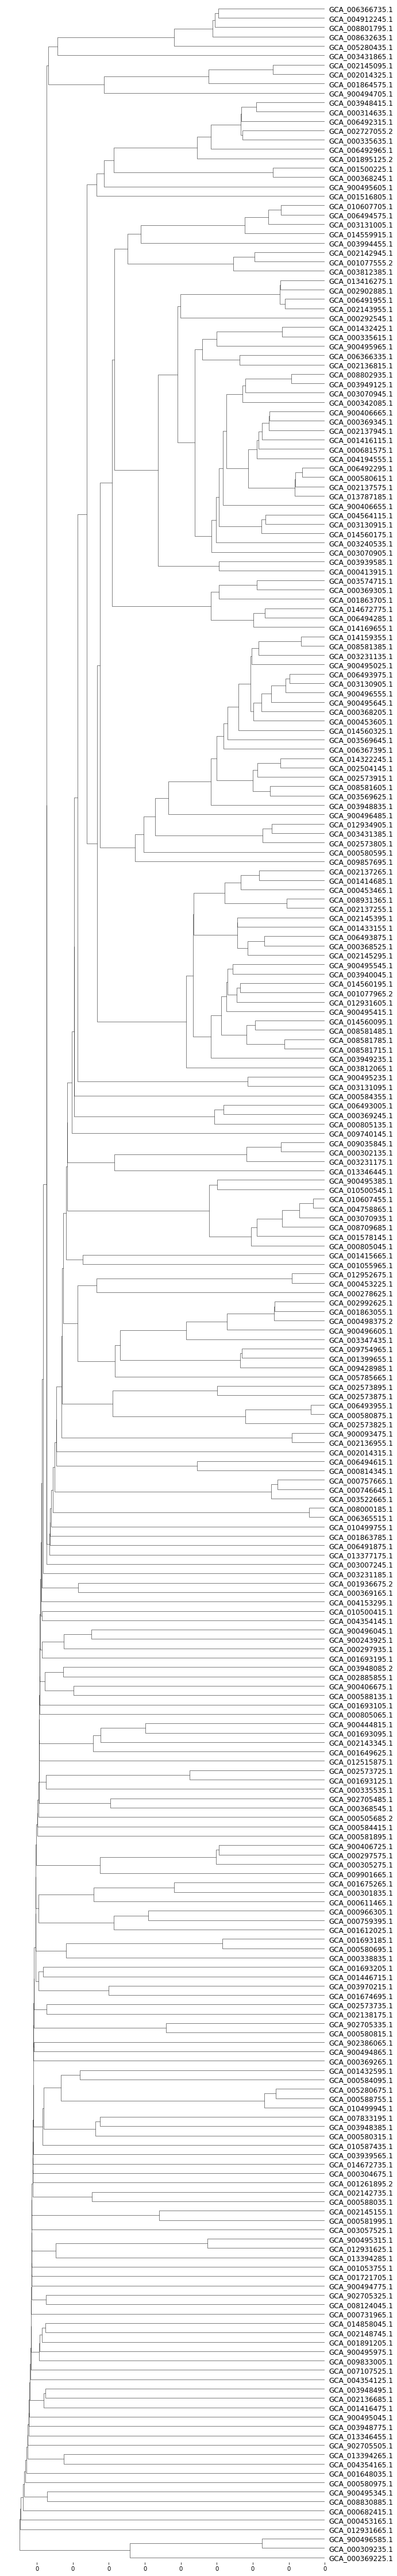

In [7]:
dendrogram.show_figure()